In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_excel(r'C:\Users\girip\Downloads\DS1_C5_S1_Income_Data_Challenge.xlsx')

In [3]:
df

,Age,WorkClass,Education,Education_Num,Marital_Status,Occupation,Relationship,Gender,Hours_Per_Week,Native_Country,Income_Bracket
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Male,40,United-States,<=50K
1,50,Self-emp,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,Male,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Male,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Female,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,Female,38,United-States,<=50K
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,Male,40,United-States,>50K
32558,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,Female,40,United-States,<=50K
32559,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,Male,20,United-States,<=50K


In [4]:
#task 1 Display column names and data types 

def display_basic_info(df):
    print("Column Names and Data Types:")
    print(df.dtypes)
    print("\nCount of Missing Values for Each Column:")
    print(df.isnull().sum())
display_basic_info(df)

Column Names and Data Types:
Age                int64
WorkClass         object
Education         object
Education_Num      int64
Marital_Status    object
Occupation        object
Relationship      object
Gender            object
Hours_Per_Week     int64
Native_Country    object
Income_Bracket    object
dtype: object

Count of Missing Values for Each Column:
Age               0
WorkClass         0
Education         0
Education_Num     0
Marital_Status    0
Occupation        0
Relationship      0
Gender            0
Hours_Per_Week    0
Native_Country    0
Income_Bracket    0
dtype: int64


In [7]:
#task 2 Define a function to identify data type of columns

def cat_num(df):
    cat=[]
    num=[]
    for col in df.columns:
        if df[col].dtype == 'object':
            cat.append(col)
        else:
            num.append(col)
    return cat,num

cat,num=cat_num(df)
from tabulate import tabulate
print(tabulate({'category':cat,'Numeric':num},headers=['category','Numeric']))

category        Numeric
--------------  --------------
WorkClass       Age
Education       Education_Num
Marital_Status  Hours_Per_Week
Occupation
Relationship
Gender
Native_Country
Income_Bracket


In [8]:
#task 3 function to find unique values and mode value

def categorical_column_analysis(df, column):
    unique_values = df[column].unique()
    mode_value = df[column].mode()[0]
    missing_values = df[column].isnull().sum()
    if missing_values > 0:
        pass
    return unique_values, mode_value, missing_values
for col in categorical_cols:
    unique_vals, mode_val, missing_vals = categorical_column_analysis(df, col)
    print("Column:", col)
    print("Unique Values:", unique_vals)
    print("Mode Value:", mode_val)
    print("Missing Values:", missing_vals)
    print("\n")

Column: WorkClass
Unique Values: [' State-gov' 'Self-emp' ' Private' ' Federal-gov' ' Local-gov' ' ?'
 ' Self-emp' ' Without-pay' ' Never-worked']
Mode Value:  Private
Missing Values: 0


Column: Education
Unique Values: [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
Mode Value:  HS-grad
Missing Values: 0


Column: Marital_Status
Unique Values: [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
Mode Value:  Married-civ-spouse
Missing Values: 0


Column: Occupation
Unique Values: [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']
Mode Value:  Prof-specialty
Missing Values: 0



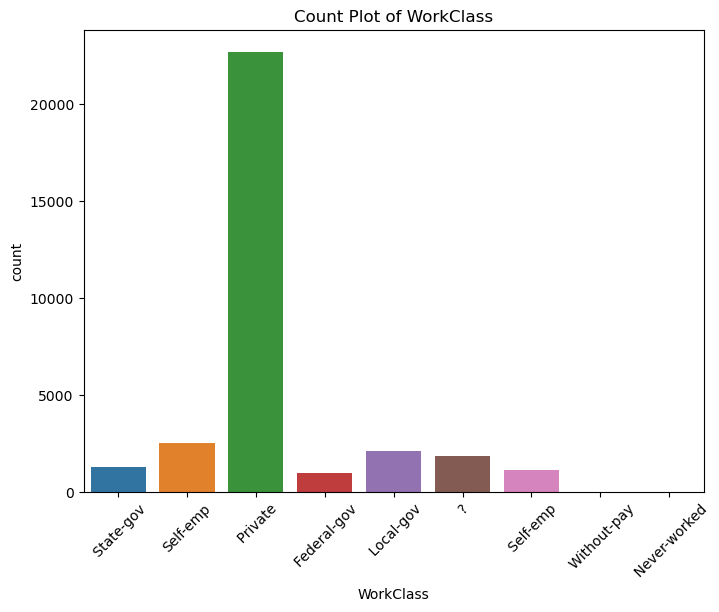

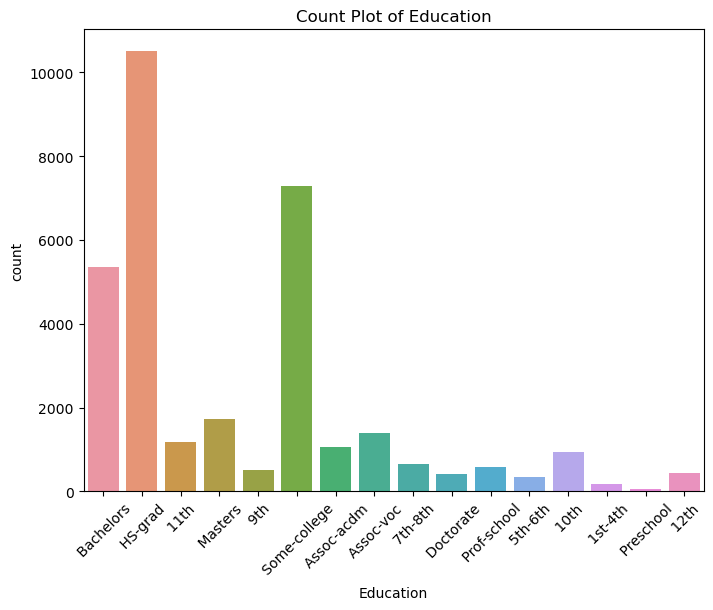

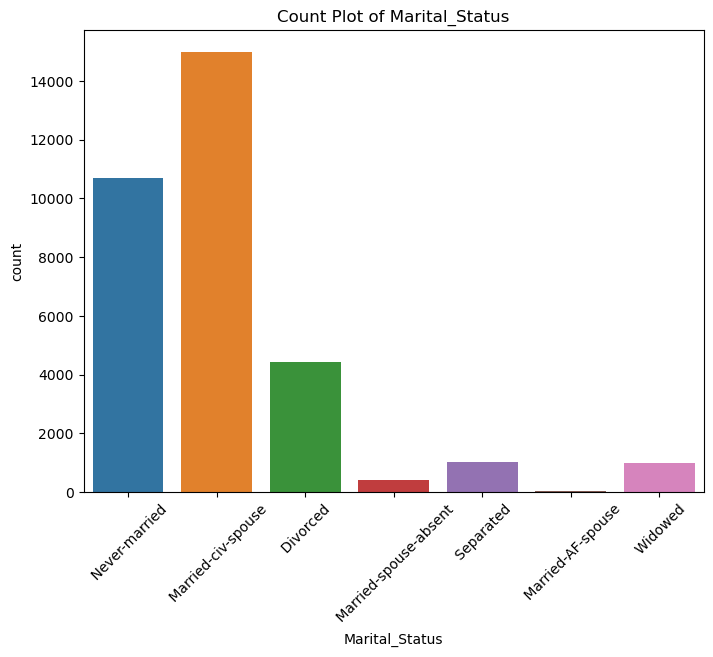

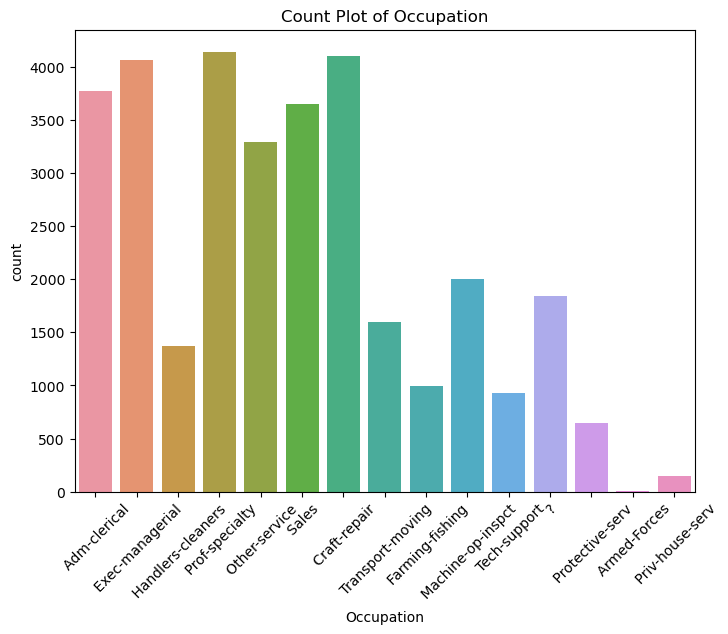

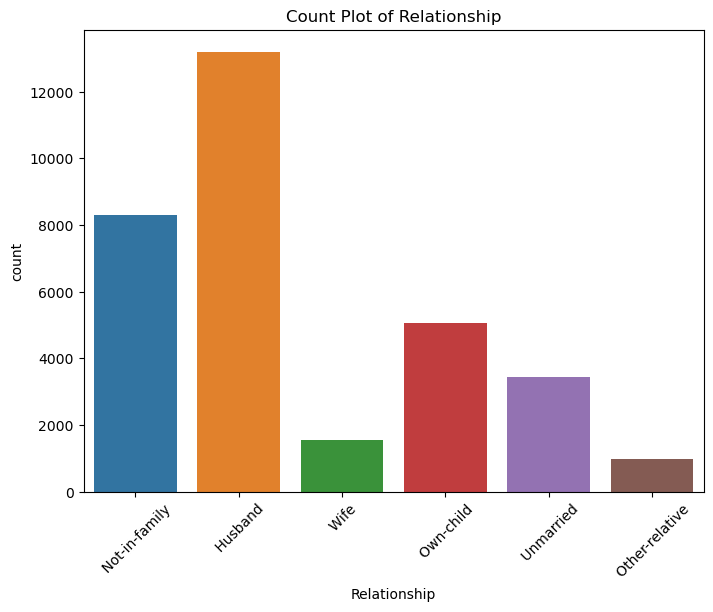

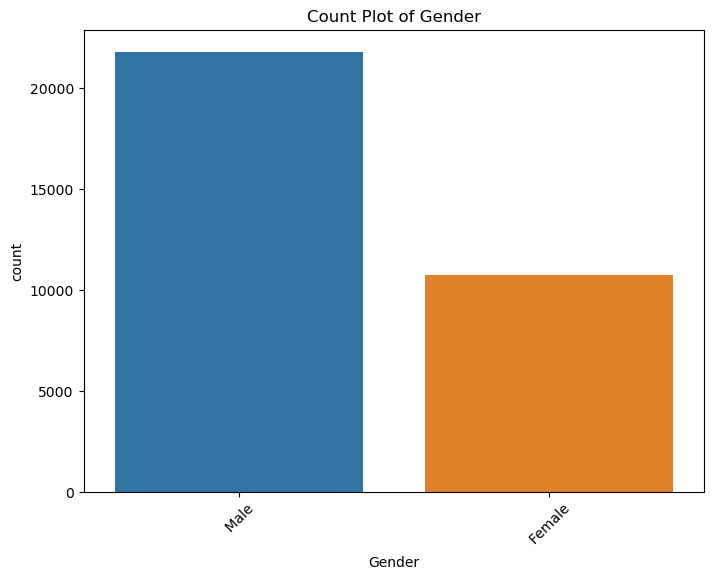

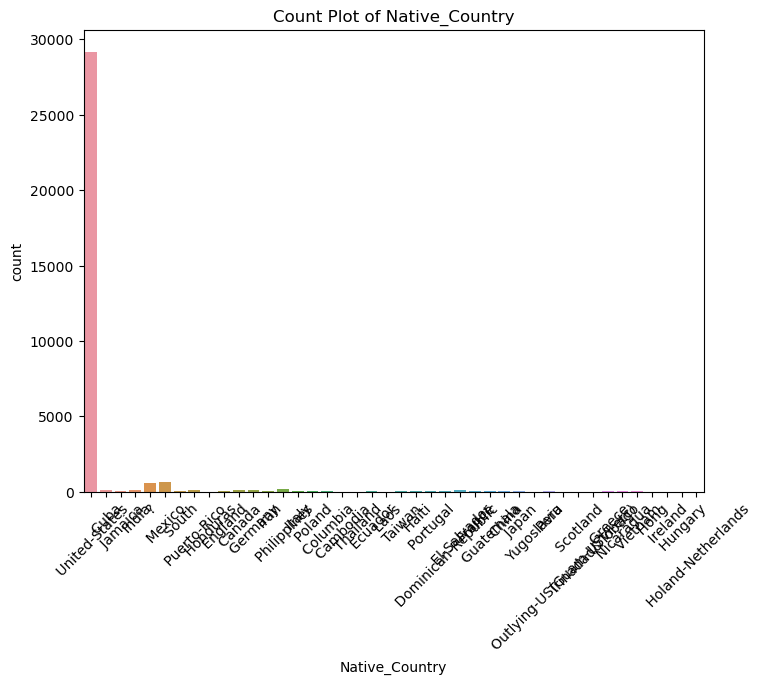

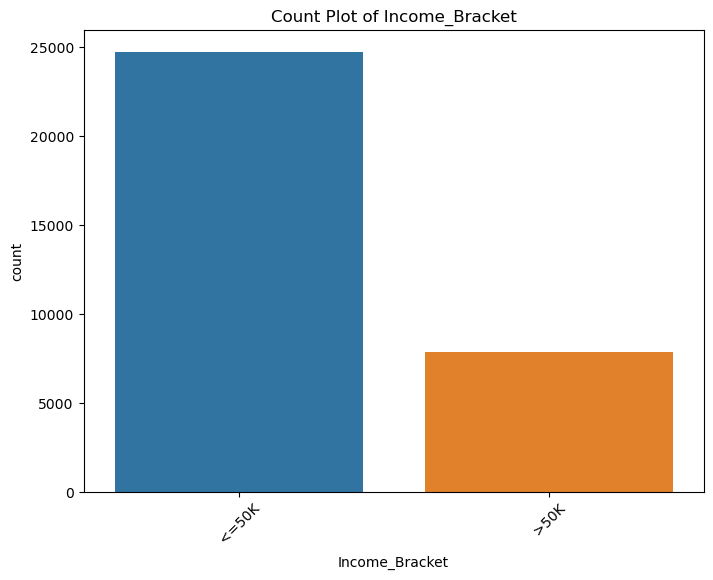

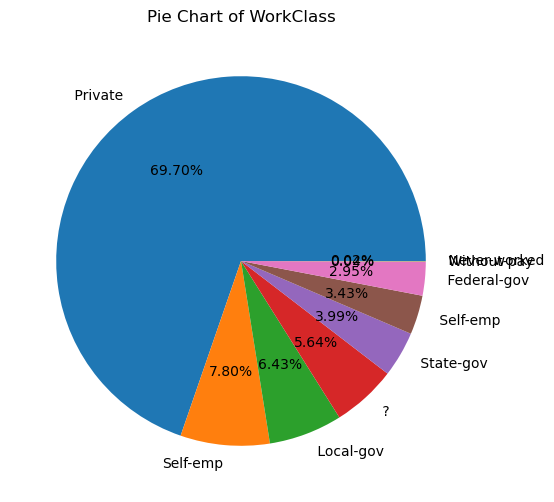

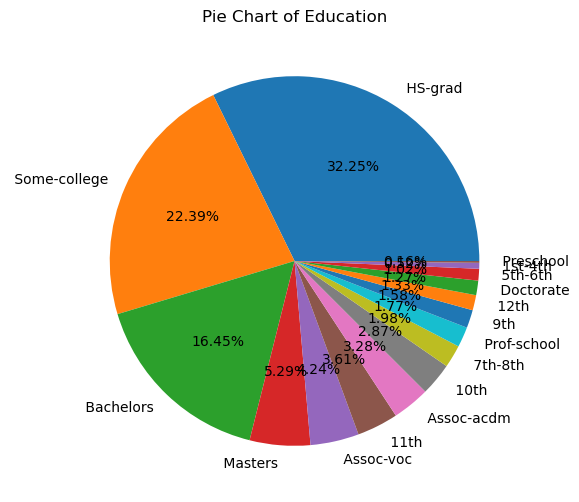

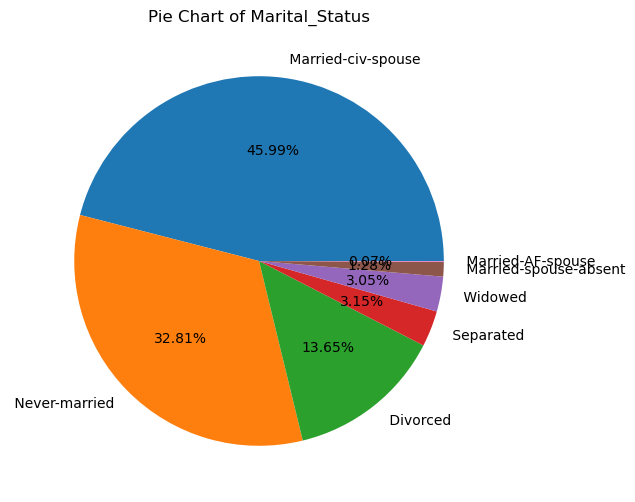

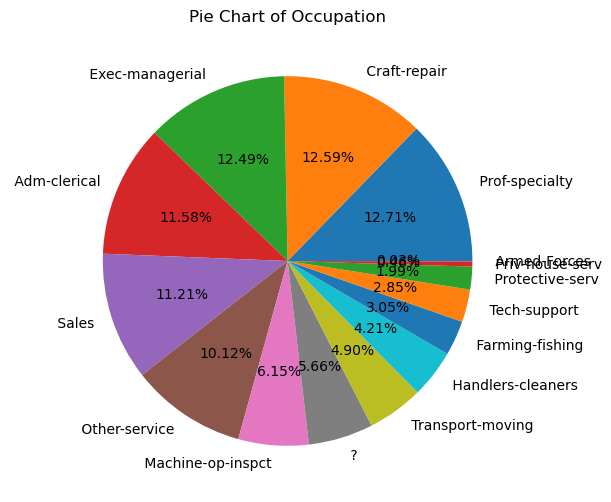

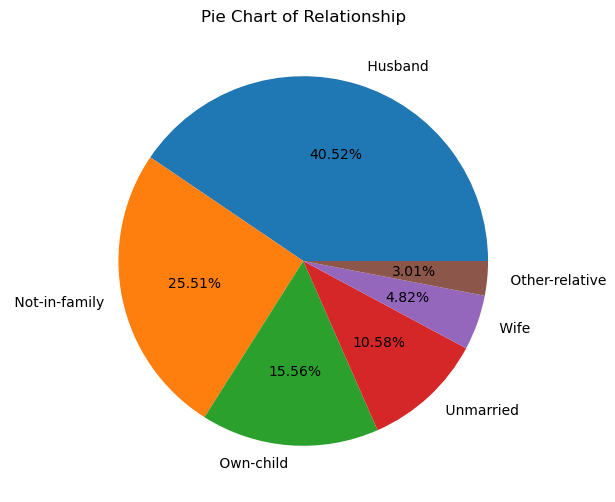

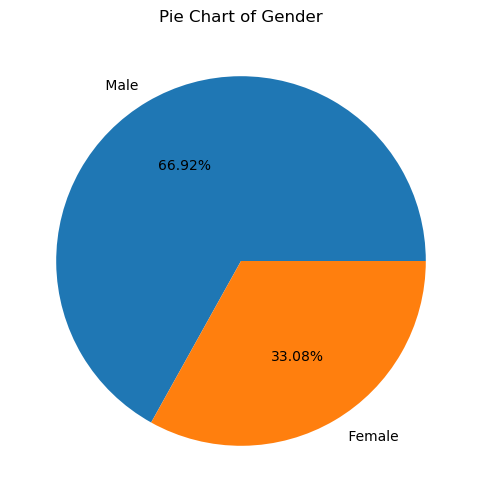

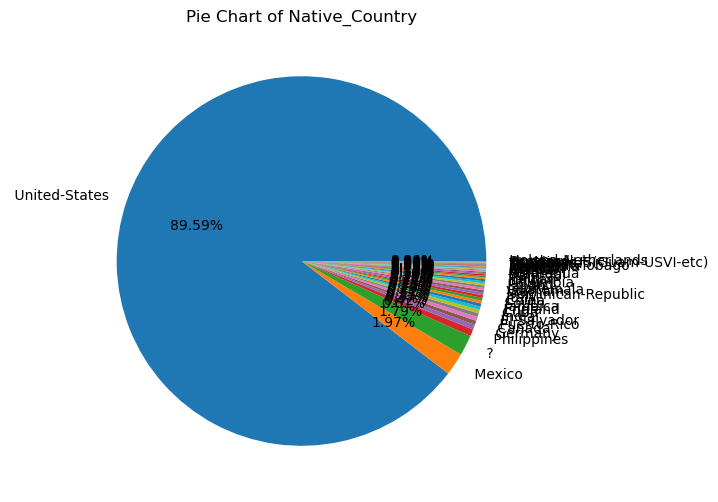

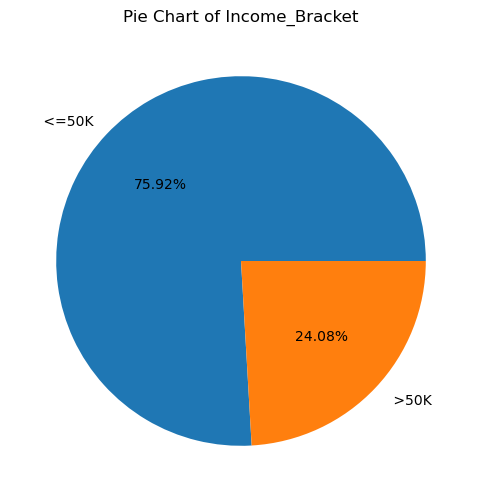

In [10]:
#task 4 Perform descriptive analysis of categorical columns with bar graphs and pie charts

def plot_categorical_columns(columns):
    for col in columns:
        plt.figure(figsize=(8,6))
        sb.countplot(x=col,data=df)
        plt.title(f'Count Plot of {col}')
        plt.xticks(rotation=45)
        plt.show()
plot_categorical_columns(categorical_cols)
def plot_pie_charts(columns):
    for col in columns:
        plt.figure(figsize=(8,6))
        df[col].value_counts().plot(kind='pie', autopct='%.2f%%')
        plt.title(f'Pie Chart of {col}')
        plt.ylabel('')
        plt.show()
plot_pie_charts(categorical_cols)

In [12]:
#task 5 Perform descriptive analysis of numerical columns

def numerical_column_analysis(col):
    central_tendency_mean = df[col].mean()
    central_tendency_median = df[col].median()
    std_deviation = df[col].std()
    missing_values = df[col].isnull().sum()
    skewness = df[col].skew()
    if missing_values > 0:
        pass
    print(f"Column: {col}")
    print(f"Mean: {central_tendency_mean}")
    print(f"Median: {central_tendency_median}")
    print(f"Standard Deviation: {std_deviation}")
    print(f"Missing Values: {missing_values}")
    print(f"Skewness: {skewness}\n")
for col in numerical_cols:
    numerical_column_analysis(col)

Column: Age
Mean: 38.58164675532078
Median: 37.0
Standard Deviation: 13.640432553581146
Missing Values: 0
Skewness: 0.5587433694130484

Column: Education_Num
Mean: 10.0806793403151
Median: 10.0
Standard Deviation: 2.5727203320673406
Missing Values: 0
Skewness: -0.3116758679102297

Column: Hours_Per_Week
Mean: 40.437455852092995
Median: 40.0
Standard Deviation: 12.34742868173081
Missing Values: 0
Skewness: 0.22764253680450092



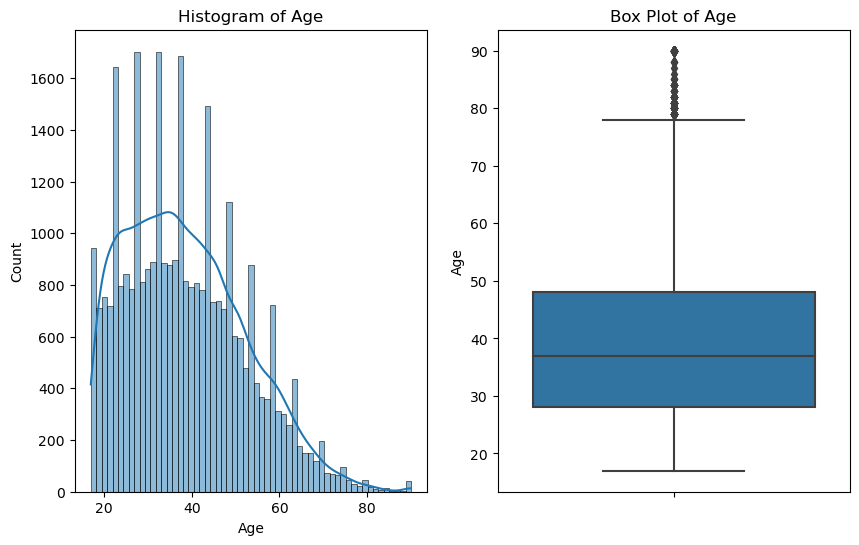

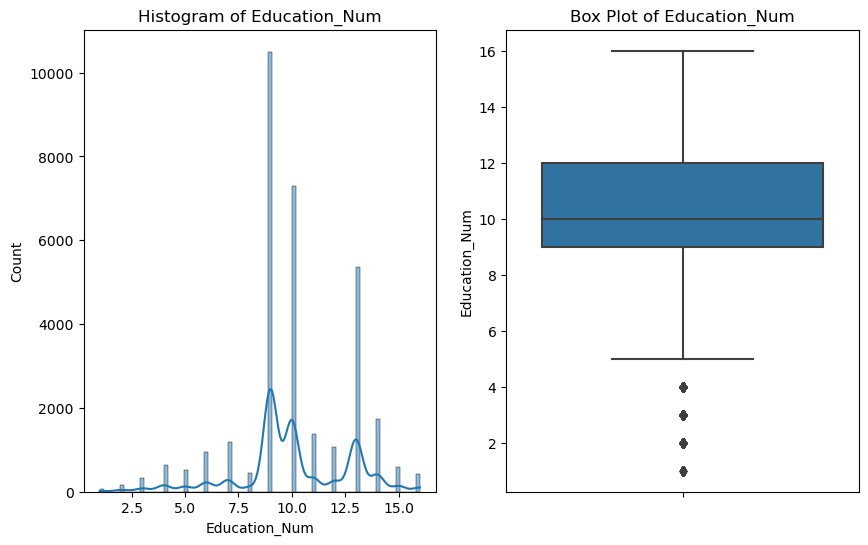

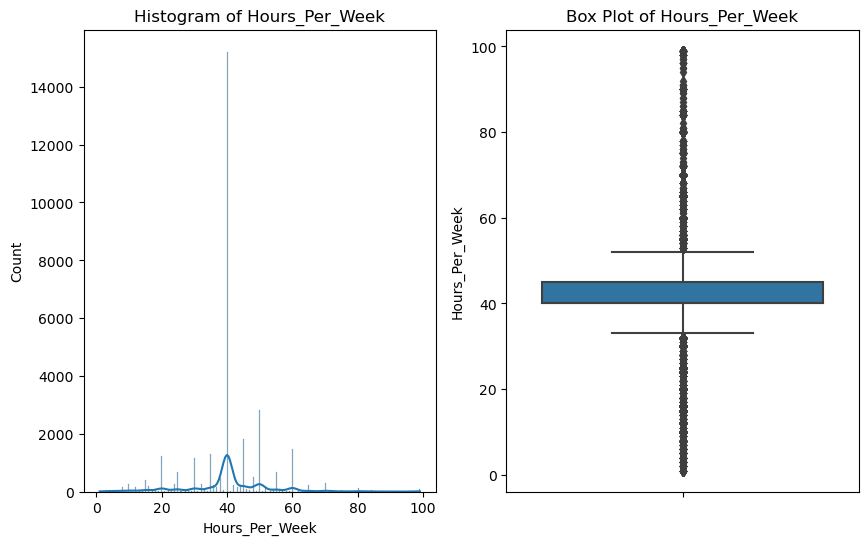

In [15]:
#task 6  Perform descriptive analysis of numerical columns with histogram and box plot

def plot_numerical_columns(columns):
    for col in columns:
        plt.figure(figsize=(10, 6))
        plt.subplot(1, 2, 1)
        sb.histplot(df[col], kde=True)
        plt.title(f'Histogram of {col}')
        plt.subplot(1, 2, 2)
        sb.boxplot(y=col, data=df)
        plt.title(f'Box Plot of {col}')
        plt.show()
plot_numerical_columns(numerical_cols)